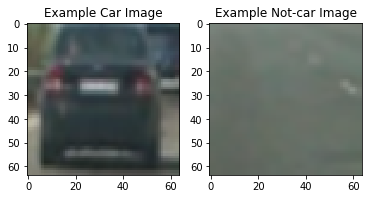

In [19]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

car_sample = mpimg.imread('../CarND-Vehicle-Detection/data_sets/vehicles/GTI_MiddleClose/image0001.png')
notcar_sample = mpimg.imread('../CarND-Vehicle-Detection/data_sets/non-vehicles/GTI/image1.png')
# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_sample)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_sample)
plt.title('Example Not-car Image')


# HOG

/home/kuangzhe/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


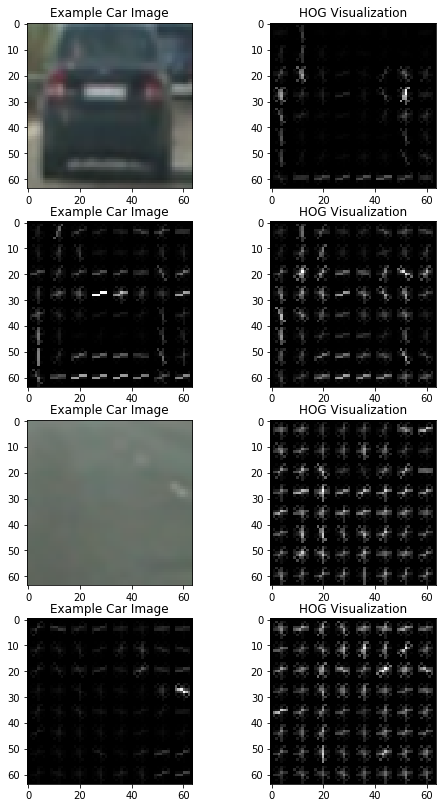

In [6]:
import lesson_functions as lf
import cv2


orient = 9
pix_per_cell = 8
cell_per_block = 2

trans_image = cv2.cvtColor(car_sample, cv2.COLOR_RGB2HLS)

feature_image_CH1 = trans_image[:,:,0]
features_CH1, hog_image_CH1 = lf.get_hog_features(feature_image_CH1, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

feature_image_CH2 = trans_image[:,:,1]
features_CH2, hog_image_CH2 = lf.get_hog_features(feature_image_CH2, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

feature_image_CH3 = trans_image[:,:,2]
features_CH3, hog_image_CH3 = lf.get_hog_features(feature_image_CH3, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

trans_image_nc = cv2.cvtColor(notcar_sample, cv2.COLOR_RGB2HLS)

feature_image_nc_CH1 = trans_image_nc[:,:,0]
features_nc_CH1, hog_image_nc_CH1 = lf.get_hog_features(feature_image_nc_CH1, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

feature_image_nc_CH2 = trans_image_nc[:,:,1]
features_nc_CH2, hog_image_nc_CH2 = lf.get_hog_features(feature_image_nc_CH2, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

feature_image_nc_CH3 = trans_image_nc[:,:,2]
features_nc_CH3, hog_image_nc_CH3 = lf.get_hog_features(feature_image_nc_CH3, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure(figsize=(8, 14))
plt.subplot(421)
plt.imshow(car_sample)
plt.title('Example Car Image')
plt.subplot(422)
plt.imshow(hog_image_CH1, cmap='gray')
plt.title('HOG Visualization')
plt.subplot(423)
plt.imshow(hog_image_CH2, cmap='gray')
plt.title('Example Car Image')
plt.subplot(424)
plt.imshow(hog_image_CH3, cmap='gray')
plt.title('HOG Visualization')

plt.subplot(425)
plt.imshow(notcar_sample)
plt.title('Example Car Image')
plt.subplot(426)
plt.imshow(hog_image_nc_CH1, cmap='gray')
plt.title('HOG Visualization')
plt.subplot(427)
plt.imshow(hog_image_nc_CH2, cmap='gray')
plt.title('Example Car Image')
plt.subplot(428)
plt.imshow(hog_image_nc_CH3, cmap='gray')
plt.title('HOG Visualization')


# Color Histogram

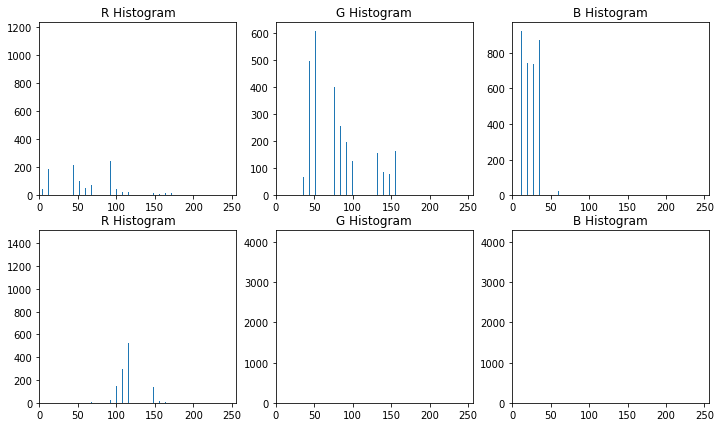

In [8]:
import numpy as np
import cv2

car_sample = cv2.imread('../CarND-Vehicle-Detection/data_sets/vehicles/GTI_MiddleClose/image0002.png')
car_sample_HSV = cv2.cvtColor(car_sample, cv2.COLOR_RGB2HLS)

notcar_sample = mpimg.imread('../CarND-Vehicle-Detection/data_sets/non-vehicles/GTI/image3.png')
notcar_sample_HSV = cv2.cvtColor(notcar_sample, cv2.COLOR_RGB2HLS)

rhist = np.histogram(car_sample_HSV[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(car_sample_HSV[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(car_sample_HSV[:,:,2], bins=32, range=(0, 256))

nrhist = np.histogram(notcar_sample_HSV[:,:,0], bins=32, range=(0, 256))
nghist = np.histogram(notcar_sample_HSV[:,:,1], bins=32, range=(0, 256))
nbhist = np.histogram(notcar_sample_HSV[:,:,2], bins=32, range=(0, 256))



# Generating bin centers
bin_edges = rhist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,7))
plt.subplot(231)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(232)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(233)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')

plt.subplot(234)
plt.bar(bin_centers, nrhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(235)
plt.bar(bin_centers, nghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(236)
plt.bar(bin_centers, nbhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')



Color Spi

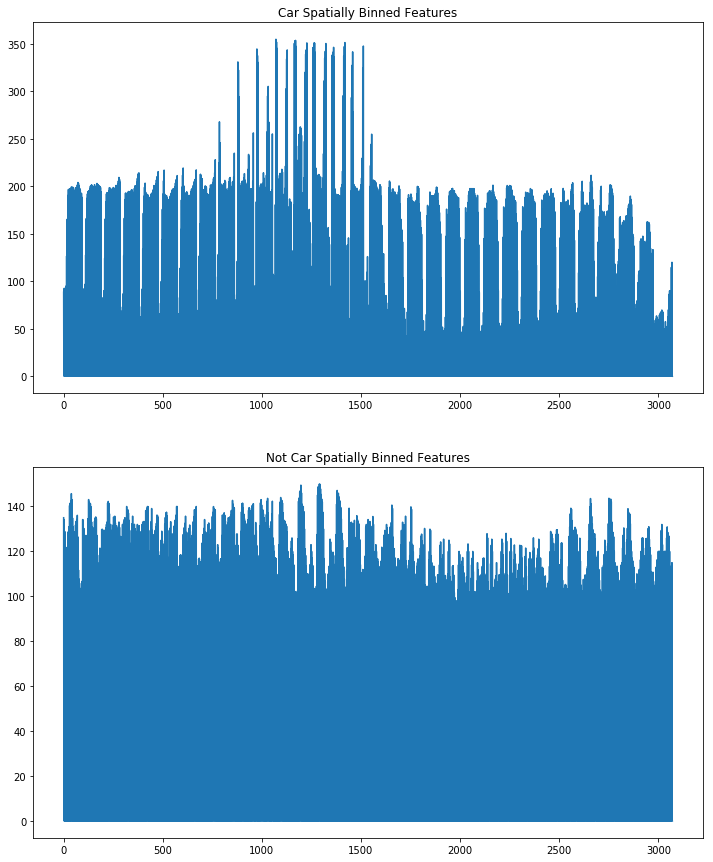

In [9]:
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

car_sample = mpimg.imread('../CarND-Vehicle-Detection/data_sets/vehicles/GTI_MiddleClose/image0001.png')
notcar_sample = mpimg.imread('../CarND-Vehicle-Detection/data_sets/non-vehicles/GTI/image1.png')


car_spat = bin_spatial(car_sample, color_space='HLS', size=(32, 32))
ncar_spat = bin_spatial(notcar_sample, color_space='HLS', size=(32, 32))

fig = plt.figure(figsize=(12,15))
plt.subplot(211)
plt.plot(car_spat)
plt.title('Car Spatially Binned Features')
plt.subplot(212)
plt.plot(ncar_spat)
plt.title('Not Car Spatially Binned Features')



# Dataset Prepare

In [167]:
import glob

cars_MC = glob.glob('../CarND-Vehicle-Detection/data_sets/vehicles/GTI_MiddleClose/image*.png')
cars_Left = glob.glob('../CarND-Vehicle-Detection/data_sets/vehicles/GTI_Left/image*.png')
cars_Right = glob.glob('../CarND-Vehicle-Detection/data_sets/vehicles/GTI_Right/image*.png')
cars_Far = glob.glob('../CarND-Vehicle-Detection/data_sets/vehicles/GTI_Far/image*.png')
cars_KITTI = glob.glob('../CarND-Vehicle-Detection/data_sets/vehicles/KITTI_extracted/*.png') 

cars_KITTI2000 = []
for idx in range(2000):
    cars_KITTI2000.append(cars_KITTI[idx])

cars = []
for elem in cars_MC:
    cars.append(elem)
for elem1 in cars_Left:
    cars.append(elem1)
for elem2 in cars_Right:
    cars.append(elem2)
for elem3 in cars_KITTI2000:
    cars.append(elem3)
for elem4 in cars_Far:
    cars.append(elem4)
    
notcars_GTI = glob.glob('../CarND-Vehicle-Detection/data_sets/non-vehicles/GTI/image*.png')
notcars_extra = glob.glob('../CarND-Vehicle-Detection/data_sets/non-vehicles/Extras/extra*.png')

notcars = []

for elem5 in notcars_GTI:
    notcars.append(elem5)
for elem6 in notcars_extra:
    notcars.append(elem6)
    
print("cars_mc:",len(cars_MC))
print("cars_Left:",len(cars_Left))
print("cars_Right:",len(cars_Right))
print("cars_KITTI:",len(cars_KITTI))
print("cars_Far:",len(cars_Far))

print("notcars_GTI:",len(notcars_GTI))
print("notcars_extra:",len(notcars_extra))

print(len(cars))
print(len(notcars))

cars_mc: 419
cars_Left: 909
cars_Right: 664
cars_KITTI: 5966
cars_Far: 834
notcars_GTI: 3900
notcars_extra: 5068
4826
8968


In [21]:
print(len(cars))

3992


# SVC Trainning

In [329]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

"""
PARAMETER AREA
"""

color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off

"""
END
"""

car_features = lf.extract_features(cars, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)

notcar_features = lf.extract_features(notcars, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)


X = np.vstack((car_features, notcar_features)).astype(np.float64)  
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Trainning:',len(X_train))
print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample

Trainning: 11035
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6060
25.68 Seconds to train SVC...
Test Accuracy of SVC =  0.9819


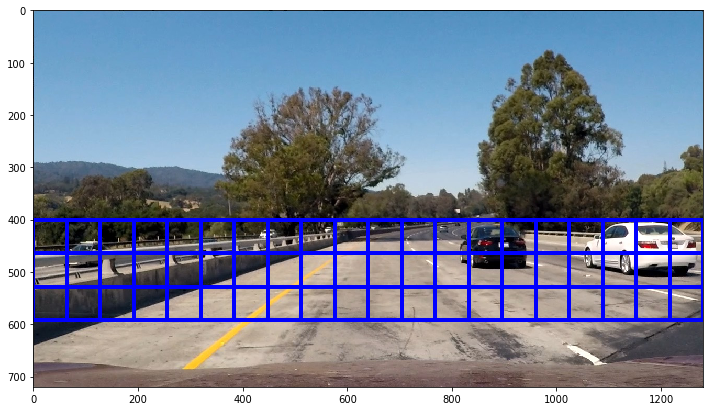

In [330]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from lesson_functions import *
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)


# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()

        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
  


y_start_stop = [400, 600] # Min and max in y to search in slide_window()


image = mpimg.imread('../CarND-Vehicle-Detection/test_images/test1.jpg')
#image = mpimg.imread('../CarND-Vehicle-Detection/bbox-example-image.jpg')

draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

fig = plt.figure(figsize=(12,7))
plt.imshow(window_img)

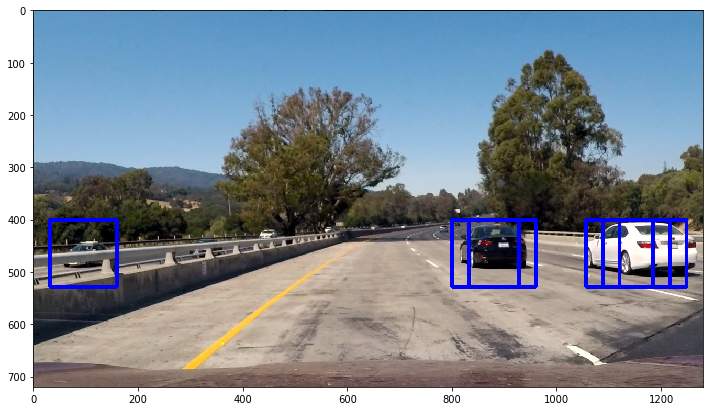

In [356]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = cv2.cvtColor(img_tosearch,  cv2.COLOR_RGB2YCrCb)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    bbox_list = []
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack(( spatial_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                bbox_list.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return draw_img,bbox_list
    
    
ystart = 400
ystop = 600
scale = 2.0

image = mpimg.imread('../CarND-Vehicle-Detection/test_images/test1.jpg')

out_img,bbox_list = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

fig = plt.figure(figsize=(12,7))
plt.imshow(out_img)

2 cars found


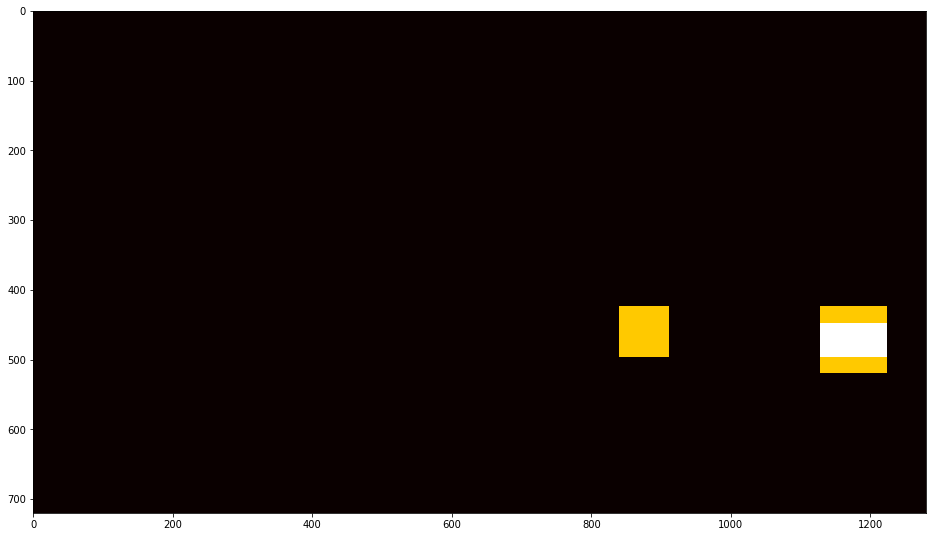

In [360]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels, color = (0,0,255)):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], color, 6)
    # Return the image
    return img

heat = np.zeros_like(image[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels,(0,0,255) )



print(labels[1], 'cars found')

fig = plt.figure(figsize=(16,14))
plt.imshow(heatmap, cmap='hot')

## Multi Scale Windows

In [354]:
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels, color = (0,0,255)):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], color, 6)
    # Return the image
    return img

def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = cv2.cvtColor(img_tosearch,  cv2.COLOR_RGB2YCrCb)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    bbox_list = []
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                #cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                bbox_list.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return bbox_list



def heat_related(image,box_list,color = (0,0,255)):

    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels,color )

    return draw_img

def multi_scale_detect(image):
    
    ystart1 = 400
    ystop1 = 600
    scale1 = 1.0

    ystart2 = 400
    ystop2 = 700
    scale2 = 1.5

    ystart3 = 400
    ystop3 = 700
    scale3 = 2.0
    
    box_list1 = find_cars(image, ystart1, ystop1, scale1, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    box_list2 = find_cars(image, ystart2, ystop2, scale2, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    box_list3 = find_cars(image, ystart3, ystop3, scale3, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    img = heat_related(image,box_list1,color = (0,0,255))
    img1 = heat_related(img,box_list2,color = (0,255,0))
    img2 = heat_related(img1,box_list3,color = (255,0,0))
    
    return img2


image1 = mpimg.imread('../CarND-Vehicle-Detection/test_images/test1.jpg')
image2 = mpimg.imread('../CarND-Vehicle-Detection/test_images/test2.jpg')
image3 = mpimg.imread('../CarND-Vehicle-Detection/test_images/test3.jpg')
image4 = mpimg.imread('../CarND-Vehicle-Detection/test_images/test4.jpg')
image5 = mpimg.imread('../CarND-Vehicle-Detection/test_images/test5.jpg')
image6 = mpimg.imread('../CarND-Vehicle-Detection/test_images/test6.jpg')


im1 = multi_scale_detect(image1)
im2 = multi_scale_detect(image2)
im3 = multi_scale_detect(image3)
im4 = multi_scale_detect(image4)
im5 = multi_scale_detect(image5)
im6 = multi_scale_detect(image6)



"""
plt.subplot(122)
plt.imshow(labels[0], cmap='gray')
plt.title('Heat Map')
fig.tight_layout()
"""

"\nplt.subplot(122)\nplt.imshow(labels[0], cmap='gray')\nplt.title('Heat Map')\nfig.tight_layout()\n"

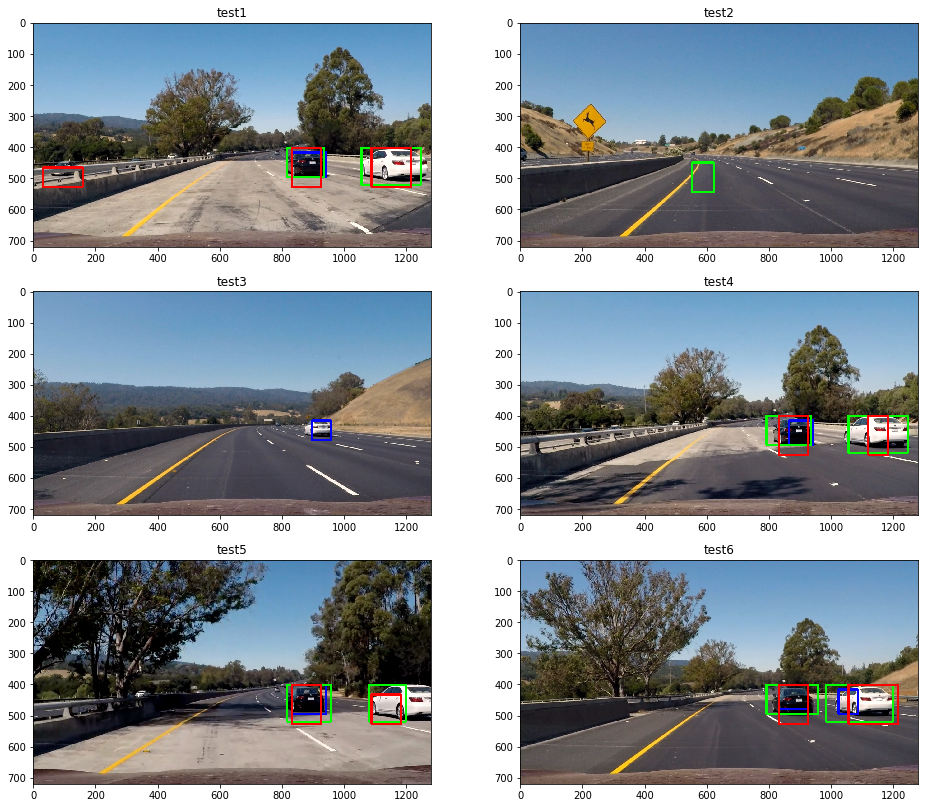

In [355]:
fig = plt.figure(figsize=(16,14))
plt.subplot(321)
plt.imshow(im1)
plt.title('test1')
plt.subplot(322)
plt.imshow(im2)
plt.title('test2')
plt.subplot(323)
plt.imshow(im3)
plt.title('test3')
plt.subplot(324)
plt.imshow(im4)
plt.title('test4')
plt.subplot(325)
plt.imshow(im5)
plt.title('test5')
plt.subplot(326)
plt.imshow(im6)
plt.title('test6')

In [250]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [334]:
frame_n1 = np.zeros_like(image[:,:,0]).astype(np.float)


def process_image(image):
    
    global frame_n1
    
    ystart1 = 400
    ystop1 = 550
    scale1 = 1.0

    ystart2 = 400
    ystop2 = 600
    scale2 = 1.5

    ystart3 = 400
    ystop3 = 700
    scale3 = 1.8
    
    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    box_list1 = find_cars(image, ystart1, ystop1, scale1, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    box_list2 = find_cars(image, ystart2, ystop2, scale2, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    

    #img,heat = heat_related(image,box_list1,box_list2,box_list3,color = (0,0,255))
    heat = add_heat(heat,box_list1)
    heat = add_heat(heat,box_list2)
    heat = apply_threshold(heat,2)
    

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)

    frame_n1 = heatmap
    
    return draw_img

In [337]:
white_output = 'white.mp4'
clip1 = VideoFileClip("../CarND-Vehicle-Detection/project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4



 12%|█▏        | 152/1261 [01:39<15:34,  1.19it/s]


 24%|██▍       | 303/1261 [03:13<09:35,  1.66it/s]


 36%|███▌      | 454/1261 [04:51<09:45,  1.38it/s]


 48%|████▊     | 605/1261 [06:25<07:19,  1.49it/s]


 60%|█████▉    | 756/1261 [08:08<04:52,  1.73it/s]


 72%|███████▏  | 907/1261 [09:46<03:54,  1.51it/s]


 84%|████████▍ | 1057/1261 [11:28<02:17,  1.48it/s]


 96%|█████████▌| 1205/1261 [13:05<00:34,  1.63it/s]


100%|█████████▉| 1260/1261 [13:43<00:00,  1.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 33min 17s, sys: 10.3 s, total: 33min 27s
Wall time: 13min 43s


In [339]:
HTML("""
<video width="640" height="360" controls>
  <source src="{0}">
</video>
""".format(white_output))